<a href="https://colab.research.google.com/github/b0r1ngx/YelpReviewsTonalAnalysingAWD_LSTM/blob/master/Yelp_Reviews_Tonal_Analysing_AWD_LSTM_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.text.all import *
# torch.cuda.set_device('cuda:0')
# check default device
default_device()

device(type='cuda', index=0)

Pick T4 GPU

Download Yelp Reviews

In [ ]:
path = untar_data(URLs.YELP_REVIEWS)

Show what data we have

In [ ]:
path.ls()

(#3) [Path('/root/.fastai/data/yelp_review_full_csv/train.csv'),Path('/root/.fastai/data/yelp_review_full_csv/test.csv'),Path('/root/.fastai/data/yelp_review_full_csv/readme.txt')]

In [ ]:
train_path = 'train.csv'
test_path = 'test.csv'
readme = 'readme.txt'

Take only part of it, cos google doesn't have enough RAM for us

In [ ]:
data = pd.read_csv(path/train_path, nrows=10000)  # 50k
data.head()

,5,"dr. goldberg offers everything i look for in a general practitioner. he's nice and easy to talk to without being patronizing; he's always on time in seeing his patients; he's affiliated with a top-notch hospital (nyu) which my parents have explained to me is very important in case something happens and you need surgery; and you can get referrals to see specialists without having to see him first. really, what more do you need? i'm sitting here trying to think of any complaints i have about him, but i'm really drawing a blank."
0,2,"Unfortunately, the frustration of being Dr. Goldberg's patient is a repeat of the experience I've had with so many other doctors in NYC -- good doctor, terrible staff. It seems that his staff simply never answers the phone. It usually takes 2 hours of repeated calling to get an answer. Who has time for that or wants to deal with it? I have run into this problem with many other doctors and I just don't get it. You have office workers, you have patients with medical needs, why isn't anyone answering the phone? It's incomprehensible and not work the aggravation. It's with regret that I..."
1,4,"Been going to Dr. Goldberg for over 10 years. I think I was one of his 1st patients when he started at MHMG. He's been great over the years and is really all about the big picture. It is because of him, not my now former gyn Dr. Markoff, that I found out I have fibroids. He explores all options with you and is very patient and understanding. He doesn't judge and asks all the right questions. Very thorough and wants to be kept in the loop on every aspect of your medical health and your life."
2,4,Got a letter in the mail last week that said Dr. Goldberg is moving to Arizona to take a new position there in June. He will be missed very much. \n\nI think finding a new doctor in NYC that you actually like might almost be as awful as trying to find a date!
3,1,"I don't know what Dr. Goldberg was like before moving to Arizona, but let me tell you, STAY AWAY from this doctor and this office. I was going to Dr. Johnson before he left and Goldberg took over when Johnson left. He is not a caring doctor. He is only interested in the co-pay and having you come in for medication refills every month. He will not give refills and could less about patients's financial situations. Trying to get your 90 days mail away pharmacy prescriptions through this guy is a joke. And to make matters even worse, his office staff is incompetent. 90% of the time when you c..."
4,5,Top notch doctor in a top notch practice. Can't say I am surprised when I was referred to him by another doctor who I think is wonderful and because he went to one of the best medical schools in the country. \nIt is really easy to get an appointment. There is minimal wait to be seen and his bedside manner is great.


Size is:

In [ ]:
data.size

20000

We need to know column names

In [ ]:
data.columns.tolist()

['5',
 "dr. goldberg offers everything i look for in a general practitioner.  he's nice and easy to talk to without being patronizing; he's always on time in seeing his patients; he's affiliated with a top-notch hospital (nyu) which my parents have explained to me is very important in case something happens and you need surgery; and you can get referrals to see specialists without having to see him first.  really, what more do you need?  i'm sitting here trying to think of any complaints i have about him, but i'm really drawing a blank."]

Column name with texts, looks strange, but we use it, cos there is texts

In [ ]:
label_column, text_column = data.columns.tolist()

In [ ]:
dls = TextDataLoaders.from_df(
    df=data,
    text_col=text_column,
    label_col=label_column
)

Save it, to next time, just load it, instead of tokenize again.

Doesn't work first method, used from torch

In [ ]:
# dls.save('default.pkl')
# dls = load_data(path)

torch.save(dls, 'default_2.pkl')

Check on what device are we does it (is CPU are TPU?)

In [ ]:
dls.device

device(type='cuda', index=0)

In [ ]:
dls.show_batch()

,text,category
0,"xxbos xxup note : xxmaj unlike xxup boa , i am happy to be contacted about my experiences and will speak to everyone who wants to hear more about my nightmare , below . xxmaj any of you ( including you , xxup boa ) can reach me at xxunk ( please subject any emails , "" boa xxup issue "" or i may not see ) . xxup boa , its people and these kind of systems are deliberately xxunk the xxup us economy to take money away from those who can least afford it . \n\n xxup fight xxup back ! ! \n\n▁ xxrep 19 - \n\n xxup omg xxrep 3 ! \n\n xxmaj what a ripoff xxrep 4 ! xxmaj they xxunk steal our money in the form of government xxunk and then , because they need more to fund their crooked system , come at us",1
1,"xxbos xxmaj and the adventure begins to xxunk … … . \n\n xxmaj on this adventure , we carefully chose our xxunk time slot , xxmaj just after the church crowd , and just before the early birds who retire early for the evening . \n\n xxmaj the number of guest in the restaurant were few , although we did notice a few smaller groups in the right side of the dining area , the left side was quite empty . xxmaj the view from the entrance allows you to view the kitchen , and it was bustling with food , and servers appeared to be quite busy moving the food out of the kitchen window . xxmaj we did witness a first hand accident which occurred at the kitchen doorway , which resulted in a loss of a few meals and dishes … … i guess someone else in",2
2,"xxbos xxmaj it 's with some regret that i rank the xxmaj shadyside xxmaj inn xxmaj suites so low . xxmaj we were there for just one night , and overall the accommodations appear quite pleasant . \n\n xxmaj for starters , we arrived at the office to check in and the gentleman in the office was on the phone . xxmaj although we stood there for at least five minutes while he finished , he never made any attempt to look at us , or indicate that he would be with us as soon as possible . xxmaj as we waited , several other staff people passed us in the office , and never acknowledged our presence . xxmaj when he finally got off the phone , he was very pleasant , but never even acknowledged the fact that we had been standing there waiting . \n\n xxmaj even",2
3,"xxbos xxup updated : xxmaj just wanted to share that we attempted to visit for a third time when my husband 's brother was in town in mid - november of 2014 . xxmaj we had reservations for 7:30 on a xxmaj tuesday , so we obviously figured we would be seated immediately . xxmaj the brother and his girlfriend arrived a couple minutes before the reservation and were told to go up to the bar while they set the table and wait for the rest of the party . i arrived about a minute after and my husband a few minutes behind me as he needed to park due to the lack of valet during the week . xxmaj there was no one at the host stand when either of us came in . xxmaj so we went up to the bar , declined a drink … and waited",5
4,"xxbos xxmaj went to xxmaj umi last night , and it was tough to get a reservation , which is usually a good sign . xxmaj but actually , in xxunk , its just a sign that people are not aware of the quality of sushi that can be found elsewhere in xxmaj pittsburgh . xxmaj it was sad , really . \n xxmaj we began with the miso soup , which was some of the \n best we have had . xxmaj nice and hot , and perfectly seasoned . xxmaj but it was downhill from there . \n xxmaj the salad was just ok . xxmaj mixed greens were wilted , but the dressing was tasty . \n xxmaj we then moved on to the "" good stuff , "" or so we thought … \n xxmaj we began with the highly - recommended "" yellowtail sashimi with",1
5,"xxbos xxmaj for our last lunch in xxmaj pittsburgh we decided to return to the xxmaj big xxmaj burrito xxmaj group ; xxmaj eleven was quite good and both xxmaj xxunk and xxmaj pittsburgh xxmaj magazine compared the experience at xxmaj casbah xxunk to that of xxmaj big xxmaj burrito 's crown jewel . xxmaj xxunk a mix of xxmaj me

accuracy - Вычисление точности с помощью targ, когда pred равно bs * n_classes

Perplexity - экспонента потери перекрестной энтропии

In [ ]:
learn = text_classifier_learner(
    dls=dls,
    arch=AWD_LSTM,
    drop_mult=0.5,
    metrics=accuracy
)

In [ ]:
# epochs = 4
# for i in range(0, epochs):
#     learn.fine_tune(1, 1e-2)
#     print(learn.show_results())

epoch,train_loss,valid_loss,accuracy,time
0,1.284930,1.169794,0.485000,02:02


epoch,train_loss,valid_loss,accuracy,time
0,1.016732,0.936457,0.589000,05:06


,text,category,category_
0,"xxbos xxmaj i 've been in the valley for 3 years - the social vacuum that is xxmaj chandler , to be exact . xxmaj because to get anywhere cool other than xxmaj downtown xxmaj chandler takes google - xxunk and planning for drive - time and checking for construction on the 101 , 60 , 202 , i rarely leave my ' hood . xxmaj sad . i know . \n\n i kept hearing about xxup lgo from friends , coworkers and others who 've apparently always dealt with driving everywhere and do n't see this as a major pain in the ass . xxmaj poor souls just have n't lived where walking and public transportation are all you really need , and everything awesome is just a short walk or train ride away . xxmaj my god , i miss xxup nyc … but i digress . \n\n",3,3
1,"xxbos xxmaj if you 've never been to downtown xxmaj gilbert to visit xxmaj joe 's xxmaj real xxup bbq , xxmaj liberty xxmaj market is another reason to check it out . xxmaj not only are there those 2 destination worthy places to chow , but xxmaj hale xxmaj centre xxmaj theatre which offers live performance theatre for post eating entertainment . xxmaj the icon for downtown xxmaj gilbert is a massive water tower that is just amazing to stand by . i know its just a water tower but the history , being built in xxunk , and the scale , 123 feet tall , it 's quite a sight to stand underneath . xxmaj with a 3 million dollar renovation and new park surrounding the tower , it 's both modern and well , cool . \n\n xxmaj here is some good news if you 're a",4,4
2,"xxbos xxmaj and the adventure begins to xxunk … … . \n\n xxmaj on this adventure , we carefully chose our xxunk time slot , xxmaj just after the church crowd , and just before the early birds who retire early for the evening . \n\n xxmaj the number of guest in the restaurant were few , although we did notice a few smaller groups in the right side of the dining area , the left side was quite empty . xxmaj the view from the entrance allows you to view the kitchen , and it was bustling with food , and servers appeared to be quite busy moving the food out of the kitchen window . xxmaj we did witness a first hand accident which occurred at the kitchen doorway , which resulted in a loss of a few meals and dishes … … i guess someone else in",2,3
3,"xxbos xxmaj food & xxmaj drinks : 4 stars \n xxmaj service : negative 5 stars \n\n xxmaj we 've been to xxmaj havana xxmaj cafe twice , however , the service that we received on our most recent visit is enough to make us rethink attempting to dine there again . xxmaj on our first visit , we sat at the bar and had some mojitos and tapas . xxmaj the mojitos were some of the better ones that xxmaj i 've found in the xxmaj valley and all three of the tapas items had great flavor and as the bartender explained , were homemade with fresh ingredients . \n\n xxmaj we were excited to come back and try out some of the entrees for dinner and returned about a week later . xxmaj there were only three other tables that were occupied , yet we were seated along",3,2
4,"xxbos i have put off writing this review for so long because the memories of my experience there are so ugly that i needed weeks to recover . xxmaj it was my xxmaj aunt 's birthday and she _ loves _ xxmaj macayo 's . i went along begrudgingly and the results were terrifying . \n\n xxmaj as a xxmaj phoenix native , xxmaj i 've known xxmaj macayo 's on xxmaj central for decades . xxmaj its unique facade xxunk the style of some grand xxmaj xxunk xxmaj mayan temple , but … no , not really . xxmaj and what is it that you want when you see pictures of xxmaj xxunk xxmaj xxunk or of xxmaj xxunk ? xxmaj you want to climb the steps , to _ go in _ . xxmaj in the case of xxmaj macayo 's , you must resist this urge with",1,1
5,"xxbos i went the the xxup ahwatukee xxmaj best xxmaj best in xxmaj phx , xxmaj az and hear is my horror story . \n\n i got a new number and cell xxup htc xxmaj one using xxmaj sprint and first off it did not work when i left

None


epoch,train_loss,valid_loss,accuracy,time
0,0.980830,0.968683,0.582400,02:13


epoch,train_loss,valid_loss,accuracy,time
0,0.941439,0.919766,0.591100,05:12


,text,category,category_
0,"xxbos xxmaj i 've been in the valley for 3 years - the social vacuum that is xxmaj chandler , to be exact . xxmaj because to get anywhere cool other than xxmaj downtown xxmaj chandler takes google - xxunk and planning for drive - time and checking for construction on the 101 , 60 , 202 , i rarely leave my ' hood . xxmaj sad . i know . \n\n i kept hearing about xxup lgo from friends , coworkers and others who 've apparently always dealt with driving everywhere and do n't see this as a major pain in the ass . xxmaj poor souls just have n't lived where walking and public transportation are all you really need , and everything awesome is just a short walk or train ride away . xxmaj my god , i miss xxup nyc … but i digress . \n\n",3,3
1,"xxbos xxmaj if you 've never been to downtown xxmaj gilbert to visit xxmaj joe 's xxmaj real xxup bbq , xxmaj liberty xxmaj market is another reason to check it out . xxmaj not only are there those 2 destination worthy places to chow , but xxmaj hale xxmaj centre xxmaj theatre which offers live performance theatre for post eating entertainment . xxmaj the icon for downtown xxmaj gilbert is a massive water tower that is just amazing to stand by . i know its just a water tower but the history , being built in xxunk , and the scale , 123 feet tall , it 's quite a sight to stand underneath . xxmaj with a 3 million dollar renovation and new park surrounding the tower , it 's both modern and well , cool . \n\n xxmaj here is some good news if you 're a",4,4
2,"xxbos xxmaj and the adventure begins to xxunk … … . \n\n xxmaj on this adventure , we carefully chose our xxunk time slot , xxmaj just after the church crowd , and just before the early birds who retire early for the evening . \n\n xxmaj the number of guest in the restaurant were few , although we did notice a few smaller groups in the right side of the dining area , the left side was quite empty . xxmaj the view from the entrance allows you to view the kitchen , and it was bustling with food , and servers appeared to be quite busy moving the food out of the kitchen window . xxmaj we did witness a first hand accident which occurred at the kitchen doorway , which resulted in a loss of a few meals and dishes … … i guess someone else in",2,2
3,xxbos i purchased glasses on 5 - 3 - 13 . i am still waiting to receive the glasses that i paid for . i paid on 5 - 3 - 13 and then waited . xxmaj after waiting two weeks i called to see when my glasses would be ready and was put on hold . i was on hold forever when i was finally told that the factory had made an error with my prescription and that they had to be sent back . i was told that they would rush the service and call me as soon as the glasses were ready . i waited a week and called to see when the glasses would be ready and was told they just arrived . i went in and picked them up . i wore the glasses for two days when a friend informed me that the glasses,1,1
4,"xxbos i went the the xxup ahwatukee xxmaj best xxmaj best in xxmaj phx , xxmaj az and hear is my horror story . \n\n i got a new number and cell xxup htc xxmaj one using xxmaj sprint and first off it did not work when i left the store , i went back and waited another 30 mins for them to activated it and got home to find out they did n't turn on some features i asked for . \n\n xxmaj then the next day an update pop up and i updated it and the next time i used the phone it would echo on the other end and would xxunk on my end . xxmaj so i took the phone back and told them what was going on and guess what they asked me ? "" what do you want me it do about it ?",1,1
5,"xxbos xxrep 3 * xxmaj kiddos , if you 're reading this right now , take if from me , you 're gon na want to go visit the xxmaj hannah xxmaj montana website or check out the new dirt on that xxmaj zoe 101 star who got knocked up by her producer or some such nonsense because that 's a hell of a lot more wholesome that what 's about to follow . xxmaj but if y

None


epoch,train_loss,valid_loss,accuracy,time
0,0.939558,0.940600,0.583900,02:13


epoch,train_loss,valid_loss,accuracy,time
0,0.903631,0.901241,0.605000,05:11


,text,category,category_
0,"xxbos xxmaj i 've been in the valley for 3 years - the social vacuum that is xxmaj chandler , to be exact . xxmaj because to get anywhere cool other than xxmaj downtown xxmaj chandler takes google - xxunk and planning for drive - time and checking for construction on the 101 , 60 , 202 , i rarely leave my ' hood . xxmaj sad . i know . \n\n i kept hearing about xxup lgo from friends , coworkers and others who 've apparently always dealt with driving everywhere and do n't see this as a major pain in the ass . xxmaj poor souls just have n't lived where walking and public transportation are all you really need , and everything awesome is just a short walk or train ride away . xxmaj my god , i miss xxup nyc … but i digress . \n\n",3,3
1,"xxbos xxmaj this place is only good for your basic exterior wash and interior cleaning . xxmaj i 've gone here several times and have had both decent and not - so - good experiences . xxmaj in short , xxmaj i 'd only recommend the cheapest package they offer -- any other packages and it 's diminishing returns . \n\n xxmaj the long story : \n xxup bad : xxmaj one time , i had taken the time clean out my entire car ( trunk and all ) so they could do a good vacuuming job . xxmaj it was n't vacuumed at all ; lint and dirt was still very visible . xxmaj common surfaces were n't dusted off in the interior . \n\n xxup good : xxmaj after this , i resolved to just getting the basic package , of which i think they do a decent",2,1
2,"xxbos xxmaj so many pros and cons here - let 's start out positive , but continue reading if you want the other input . \n - xxmaj terrific location in xxmaj scottsdale close to shopping and restaurants ( if that 's what you want ) . \n - xxmaj visually stunning as you walk in and look out to the distance over the golf course \n - xxmaj love sitting around the fire pit with a glass of wine . i do wish they 'd put chairs instead of benches . xxmaj slightly awkward if you 're alone or want to really relax . \n - xxmaj gorgeous grounds \n - delicious desert counter in the evenings in the lobby ! \n\n xxmaj however , \n - xxmaj we booked online through the xxmaj starwood website . xxmaj none of our requests ( only 2 ) were sent to",2,1
3,"xxbos xxmaj if you 've never been to downtown xxmaj gilbert to visit xxmaj joe 's xxmaj real xxup bbq , xxmaj liberty xxmaj market is another reason to check it out . xxmaj not only are there those 2 destination worthy places to chow , but xxmaj hale xxmaj centre xxmaj theatre which offers live performance theatre for post eating entertainment . xxmaj the icon for downtown xxmaj gilbert is a massive water tower that is just amazing to stand by . i know its just a water tower but the history , being built in xxunk , and the scale , 123 feet tall , it 's quite a sight to stand underneath . xxmaj with a 3 million dollar renovation and new park surrounding the tower , it 's both modern and well , cool . \n\n xxmaj here is some good news if you 're a",4,4
4,"xxbos i purchased $ xxunk glasses on 5 - 3 - 13 . i am on the fourth set of glasses which translates into 6 trips to xxmaj nationwide xxmaj vision xxmaj center . xxmaj six trips for one item ! xxmaj how many chances do you give a professional business to deliver on one $ 800.00 item ? xxmaj ok , maybe i assumed they were a professional business . i have a simple xxunk subscription . xxmaj when i ordered i asked for glasses without the lines on the lenses . i also asked for glasses that worked like sunglasses outside and regular glasses indoors . i was given a bill and i paid my portion and was told i would be called when the glasses were ready . i called two weeks after ordering my glasses and was told the factory made an error and the glasses",1,1
5,"xxbos xxmaj food & xxmaj drinks : 4 stars \n xxmaj service : negative 5 stars \n\n xxmaj we 've been to xxmaj havana xxmaj cafe twice , however , the service that we received on our most recent visit is enough to make us ret

None


epoch,train_loss,valid_loss,accuracy,time
0,0.862363,0.907899,0.605300,02:12


epoch,train_loss,valid_loss,accuracy,time
0,0.857493,0.884186,0.614200,05:11


,text,category,category_
0,"xxbos xxmaj i 've been in the valley for 3 years - the social vacuum that is xxmaj chandler , to be exact . xxmaj because to get anywhere cool other than xxmaj downtown xxmaj chandler takes google - xxunk and planning for drive - time and checking for construction on the 101 , 60 , 202 , i rarely leave my ' hood . xxmaj sad . i know . \n\n i kept hearing about xxup lgo from friends , coworkers and others who 've apparently always dealt with driving everywhere and do n't see this as a major pain in the ass . xxmaj poor souls just have n't lived where walking and public transportation are all you really need , and everything awesome is just a short walk or train ride away . xxmaj my god , i miss xxup nyc … but i digress . \n\n",3,3
1,"xxbos xxmaj so many pros and cons here - let 's start out positive , but continue reading if you want the other input . \n - xxmaj terrific location in xxmaj scottsdale close to shopping and restaurants ( if that 's what you want ) . \n - xxmaj visually stunning as you walk in and look out to the distance over the golf course \n - xxmaj love sitting around the fire pit with a glass of wine . i do wish they 'd put chairs instead of benches . xxmaj slightly awkward if you 're alone or want to really relax . \n - xxmaj gorgeous grounds \n - delicious desert counter in the evenings in the lobby ! \n\n xxmaj however , \n - xxmaj we booked online through the xxmaj starwood website . xxmaj none of our requests ( only 2 ) were sent to",2,1
2,"xxbos xxmaj phoenix xxmaj zoo employee xxmaj brandon ( white male in his 20s ) . who was working the front gate called me a xxmaj dick . \n\n xxmaj you are not gon na believe this , xxmaj i 'm still in shock . xxmaj worst interaction with any employee ever . \n xxmaj my mother was visiting here from out of town and we decided to take my 2 1 / 2 year old my mom and myself to the xxmaj phoenix xxmaj zoo today . \n xxmaj we got there at noon and purchase the xxmaj wild xxmaj ride bands . xxmaj we spent all day at the zoo and were exhausted at the end of the day . xxmaj it was 5 pm and the zoo was closing so we were making our way to the exit . i had my 2 1 / 2 yr",1,1
3,"xxbos i was a member for over 6 years at this location . xxmaj it was very convenient to where i used to live . i had to cancel due to there not being an xxup la xxmaj fit nearby the new house . xxmaj this was relatively easy compared to what i had heard about cancelling from others . xxmaj you have to go in and speak with a manager between 9 - 5pm xxup m - f but can go to any xxup la xxmaj fit to do this . xxmaj here 's my take over the past 6 years and take it for what it 's worth : \n\n xxmaj when i signed up , i felt like it was a decent value . i go there for cardio . i do n't lift weights , take classes , use the pool , or locker rooms .",2,2
4,"xxbos i went the the xxup ahwatukee xxmaj best xxmaj best in xxmaj phx , xxmaj az and hear is my horror story . \n\n i got a new number and cell xxup htc xxmaj one using xxmaj sprint and first off it did not work when i left the store , i went back and waited another 30 mins for them to activated it and got home to find out they did n't turn on some features i asked for . \n\n xxmaj then the next day an update pop up and i updated it and the next time i used the phone it would echo on the other end and would xxunk on my end . xxmaj so i took the phone back and told them what was going on and guess what they asked me ? "" what do you want me it do about it ?",1,1
5,"xxbos xxrep 3 * xxmaj kiddos , if you 're reading this right now , take if from me , you 're gon na want to go visit the xxmaj hannah xxmaj montana website or check out the new dirt on that xxmaj zoe 101 star who got knocked up by her producer or some such nonsense because that 's a hell of a lot more wholesome that what 's about to follow . xxmaj but if you want to learn a new curse word or two to awe your peers on the playground , keep reading . xxmaj who am i kiddin

None


In [ ]:
# learn.save('learn_on_accuracy')

Path('models/learn_on_accuracy.pth')

In [ ]:
# learn.show_results()

,text,category,category_
0,"xxbos xxmaj i 've been in the valley for 3 years - the social vacuum that is xxmaj chandler , to be exact . xxmaj because to get anywhere cool other than xxmaj downtown xxmaj chandler takes google - xxunk and planning for drive - time and checking for construction on the 101 , 60 , 202 , i rarely leave my ' hood . xxmaj sad . i know . \n\n i kept hearing about xxup lgo from friends , coworkers and others who 've apparently always dealt with driving everywhere and do n't see this as a major pain in the ass . xxmaj poor souls just have n't lived where walking and public transportation are all you really need , and everything awesome is just a short walk or train ride away . xxmaj my god , i miss xxup nyc … but i digress . \n\n",3,2
1,"xxbos xxup note : xxmaj unlike xxup boa , i am happy to be contacted about my experiences and will speak to everyone who wants to hear more about my nightmare , below . xxmaj any of you ( including you , xxup boa ) can reach me at xxunk ( please subject any emails , "" boa xxup issue "" or i may not see ) . xxup boa , its people and these kind of systems are deliberately engineering the xxup us economy to take money away from those who can least afford it . \n\n xxup fight xxup back ! ! \n\n▁ xxrep 19 - \n\n xxup omg xxrep 3 ! \n\n xxmaj what a ripoff xxrep 4 ! xxmaj they xxunk steal our money in the form of government handouts and then , because they need more to fund their crooked system , come at us",1,1
2,"xxbos xxmaj if you 've never been to downtown xxmaj gilbert to visit xxmaj joe 's xxmaj real xxup bbq , xxmaj liberty xxmaj market is another reason to check it out . xxmaj not only are there those 2 destination worthy places to chow , but xxmaj hale xxmaj centre xxmaj theatre which offers live performance theatre for post eating entertainment . xxmaj the icon for downtown xxmaj gilbert is a massive water tower that is just amazing to stand by . i know its just a water tower but the history , being built in xxunk , and the scale , 123 feet tall , it 's quite a sight to stand underneath . xxmaj with a 3 million dollar renovation and new park surrounding the tower , it 's both modern and well , cool . \n\n xxmaj here is some good news if you 're a",4,4
3,"xxbos xxmaj and the adventure begins to xxunk … … . \n\n xxmaj on this adventure , we carefully chose our xxunk time slot , xxmaj just after the church crowd , and just before the early birds who retire early for the evening . \n\n xxmaj the number of guest in the restaurant were few , although we did notice a few smaller groups in the right side of the dining area , the left side was quite empty . xxmaj the view from the entrance allows you to view the kitchen , and it was bustling with food , and servers appeared to be quite busy moving the food out of the kitchen window . xxmaj we did witness a first hand accident which occurred at the kitchen doorway , which resulted in a loss of a few meals and dishes … … i guess someone else in",2,3
4,"xxbos i was a member for over 6 years at this location . xxmaj it was very convenient to where i used to live . i had to cancel due to there not being an xxup la xxmaj fit nearby the new house . xxmaj this was relatively easy compared to what i had heard about cancelling from others . xxmaj you have to go in and speak with a manager between 9 - 5pm xxup m - f but can go to any xxup la xxmaj fit to do this . xxmaj here 's my take over the past 6 years and take it for what it 's worth : \n\n xxmaj when i signed up , i felt like it was a decent value . i go there for cardio . i do n't lift weights , take classes , use the pool , or locker rooms .",2,2
5,"xxbos i purchased $ xxunk glasses on 5 - 3 - 13 . i am on the fourth set of glasses which translates into 6 trips to xxmaj nationwide xxmaj vision xxmaj center . xxmaj six trips for one item ! xxmaj how many chances do you give a professional business to deliver on one $ 800.00 item ? xxmaj ok , maybe i assumed they were a professi

In [ ]:
learn.fine_tune(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.792007,1.055426,0.557000,00:27


epoch,train_loss,valid_loss,accuracy,time
0,0.827045,1.070257,0.545000,01:02


Now we can predict new texts



In [ ]:
learn.predict("I really liked doctor")

('5', tensor(4), tensor([0.0136, 0.0044, 0.0106, 0.0545, 0.9169]))

In [ ]:
learn.predict("When i was on doctor, it was really weird how he talking with me, I think next time i visit other doctor")

('2', tensor(1), tensor([0.3480, 0.5055, 0.1009, 0.0413, 0.0043]))

In [ ]:
learn.predict("It was the worst visit")

('5', tensor(4), tensor([0.4261, 0.0505, 0.0259, 0.0103, 0.4873]))

In [ ]:
answer = learn.predict("Weird")
answer

('1', tensor(0), tensor([0.9320, 0.0111, 0.0194, 0.0060, 0.0315]))

In [ ]:
int(answer[0])

1

In [ ]:
data_test = pd.read_csv(path/test_path, nrows=1000)
data_test.head()

,1,"I got 'new' tires from them and within two weeks got a flat. I took my car to a local mechanic to see if i could get the hole patched, but they said the reason I had a flat was because the previous patch had blown - WAIT, WHAT? I just got the tire and never needed to have it patched? This was supposed to be a new tire. \nI took the tire over to Flynn's and they told me that someone punctured my tire, then tried to patch it. So there are resentful tire slashers? I find that very unlikely. After arguing with the guy and telling him that his logic was far fetched he said he'd give me a new tire \""this time\"". \nI will never go back to Flynn's b/c of the way this guy treated me and the simple fact that they gave me a used tire!"
0,1,"Don't waste your time. We had two different people come to our house to give us estimates for a deck (one of them the OWNER). Both times, we never heard from them. Not a call, not the estimate, nothing."
1,1,"All I can say is the worst! We were the only 2 people in the place for lunch, the place was freezing and loaded with kids toys! 2 bicycles, a scooter, and an electronic keyboard graced the dining room. A fish tank with filthy, slimy fingerprints smeared all over it is there for your enjoyment.\n\nOur food came... no water to drink, no tea, medium temperature food. Of course its cold, just like the room, I never took my jacket off! The plates are too small, you food spills over onto some semi-clean tables as you sit in your completely worn out booth seat. The fried noodles were out of a box..."
2,1,"I have been to this restaurant twice and was disappointed both times. I won't go back. The first time we were there almost 3 hours. It took forever to order and then forever for our food to come and the place was empty. When I complained the manager was very rude and tried to blame us for taking to long to order. It made no sense, how could we order when the waitress wasn't coming to the table? After arguing with me he ended up taking $6 off of our $200+ bill. Ridiculous. If it were up to me I would have never returned. Unfortunately my family decided to go here again tonight. Again it too..."
3,1,Food was NOT GOOD at all! My husband & I ate here a couple weeks ago for the first time. I ordered a salad & basil pesto cream pasta & my husband ordered the spinach & feta pasta. The salad was just a huge plate of spring mix (nothing else in it) with WAY to much vinegar dressing. My lettuce was drowning in the vinegar. My pesto pasta had no flavor (did not taste like a cream sauce to me) & the pesto was so runny/watery & way too much sauce not enough noodles. My husband's pasta had even less flavor than mine. We ate about a quarter of the food & couldn't even finish it. We took it home & ...
4,3,"This is a tiny Starbucks and it locations like this (although cute) makes you wonder if your really meant to hang out or just grab your coffee and leave. Leaving is always a good idea at this location anyway since you have a nice fountain in the back with benches and it is a central part of the Waterfront Shopping. \n\nStarbuck isn't my favorite coffee chain by any means. Is it just me or do all Starbuck coffees taste a little burnt and bitter? No matter how trendy, cool and upscale their establishments are I can't get around the yicky tasting bitterness of Staryucks regular coffees. Talk ..."


In [ ]:
actual = []
predict = []

for index, row in data_test.iterrows():
    label = row[0]
    text = row[1]

    actual.append(label)
    answer = learn.predict(text)
    predict.append(int(answer[0]))

    if index % 100 == 0:
        print('Now on: ', index)

    # if index % 1000 == 0:
    #   break

Now on:  0


Now on:  100


Now on:  200


Now on:  300


Now on:  400


Now on:  500


Now on:  600


Now on:  700


Now on:  800


Now on:  900


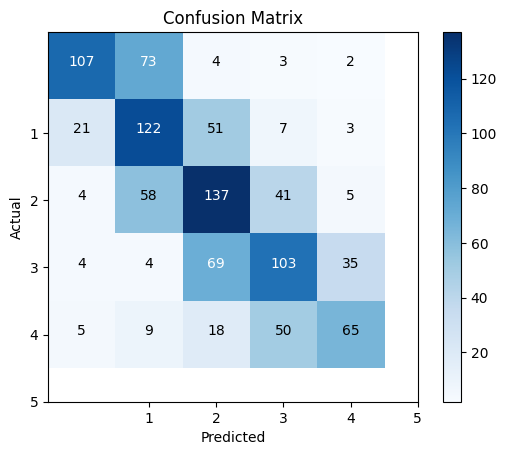

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(actual, predict)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(1, 6)
marks = ['1', '2', '3', '4', '5']
plt.xticks(tick_marks, marks)
plt.yticks(tick_marks, marks)

plt.xlabel('Predicted')
plt.ylabel('Actual')

# Add labels to each cell
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.show()
